In [1]:
# The codes/data generator are borrowed from unet implementation. 
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
from mobileunet import *
from unet.data import *
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2, width_shift_range=0.05, height_shift_range=0.05,
                    shear_range=0.05, zoom_range=0.05, horizontal_flip=True,fill_mode='nearest')
myGene = trainGenerator(2,'unet/data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = mobileunet()
model_checkpoint = ModelCheckpoint('mobileunet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

Epoch 1/5
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
2000/2000 [==============================] - 638s 319ms/step - loss: 0.1482 - acc: 0.9349

Epoch 00001: loss improved from inf to 0.14822, saving model to mobileunet_membrane.hdf5
Epoch 2/5
2000/2000 [==============================] - 621s 310ms/step - loss: 0.0915 - acc: 0.9600

Epoch 00002: loss improved from 0.14822 to 0.09153, saving model to mobileunet_membrane.hdf5
Epoch 3/5
2000/2000 [==============================] - 626s 313ms/step - loss: 0.0756 - acc: 0.9670

Epoch 00003: loss improved from 0.09153 to 0.07560, saving model to mobileunet_membrane.hdf5
Epoch 4/5
2000/2000 [==============================] - 610s 305ms/step - loss: 0.0678 - acc: 0.9703

Epoch 00004: loss improved from 0.07560 to 0.06783, saving model to mobileunet_membrane.hdf5
Epoch 5/5
2000/2000 [==============================] - 624s 312ms/step - loss: 0.0631 - acc: 0.9724

Epoch 00005: loss improved from 0.06783 to 0.06

### Test the model and visulize the result

In [3]:
testGene = testGenerator("unet/data/membrane/test")
model = mobileunet()
model.load_weights("mobileunet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)

30/30 [==============================] - 2s 73ms/step


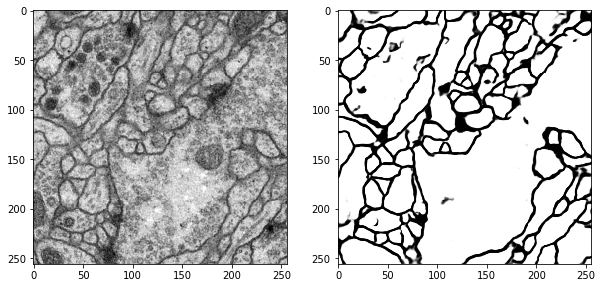

In [4]:
fig=plt.figure(figsize=(10, 10))
testGene = testGenerator("unet/data/membrane/test")

num_to_display = 1
for i in range(num_to_display):
    fig.add_subplot(num_to_display, 2, 2*i+1)
    img = next(testGene)
    plt.imshow(img.reshape((256,256)),cmap='gray')
    fig.add_subplot(num_to_display, 2, 2*i+2)
    plt.imshow(results[i].reshape((256,256)),cmap='gray')    
plt.show()